In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read data
data = pd.read_csv('C:/Users/RW565TZ/Practice/lending_club_loan_two.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [4]:
data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [5]:
# Checking null values
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [6]:
data.shape

(396030, 27)

<AxesSubplot:xlabel='loan_status', ylabel='count'>

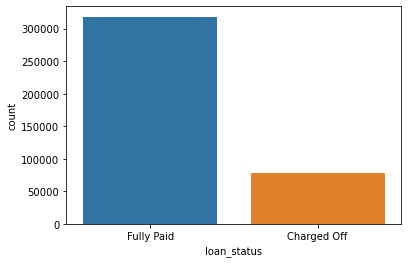

In [7]:
# Countplot for loan status
sns.countplot(x = 'loan_status',data=data)

<AxesSubplot:xlabel='loan_amnt'>

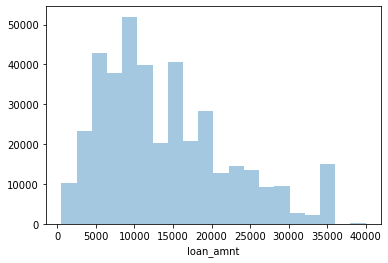

In [8]:
# Distplot for loan amount
sns.distplot(data['loan_amnt'],kde=False,bins=20)

In [9]:
# Finding correlations
data.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

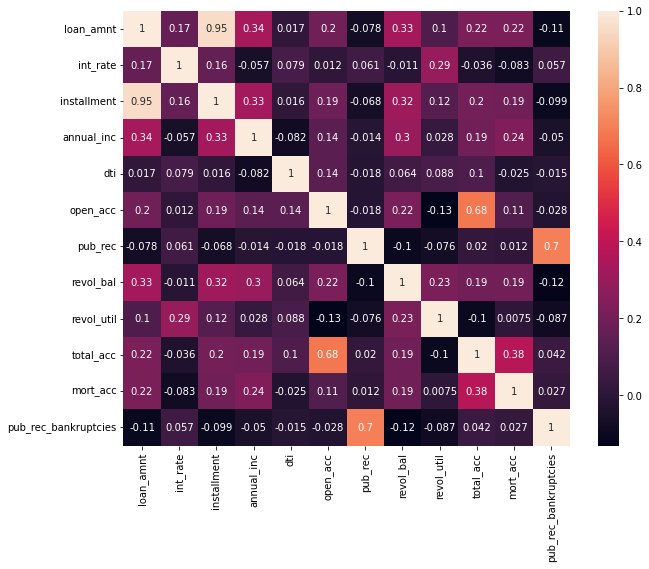

In [10]:
# Plotting heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,)

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

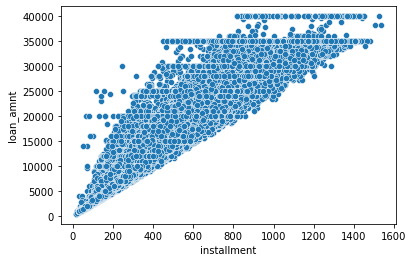

In [11]:
# Scatterplot between installment and loan amount
sns.scatterplot(x='installment',y='loan_amnt',data=data)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

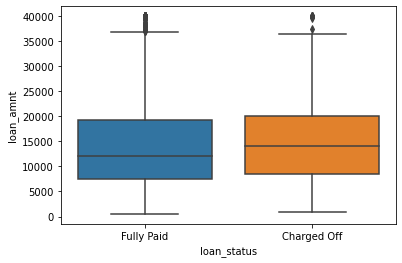

In [12]:
# Boxplot between loan status and loan amount
sns.boxplot(x='loan_status',y='loan_amnt',data=data)

In [13]:
data.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


<AxesSubplot:xlabel='grade', ylabel='count'>

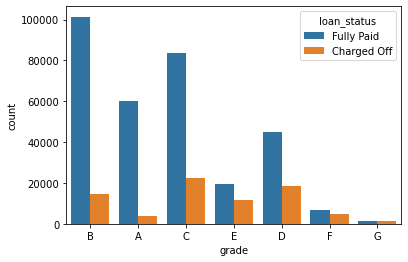

In [14]:
# Count plot 
sns.countplot(x='grade',data=data,hue='loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

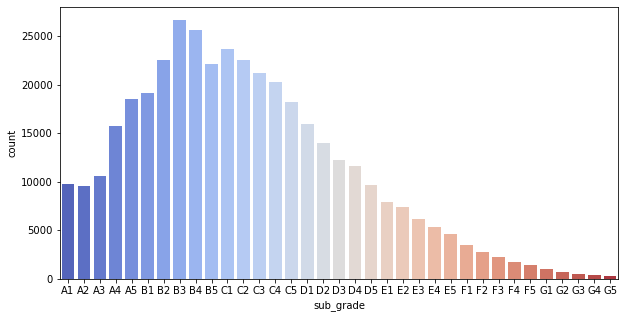

In [15]:
# Count plot subgrade
plt.figure(figsize=(10,5))
subgrp = sorted(data['sub_grade'].unique())
sns.countplot(x='sub_grade',data=data,order=subgrp,palette='coolwarm')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

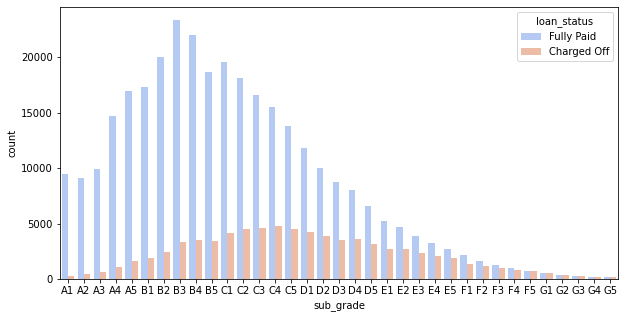

In [16]:
plt.figure(figsize=(10,5))
subgrp = sorted(data['sub_grade'].unique())
sns.countplot(x='sub_grade',data=data,order=subgrp,palette='coolwarm',hue='loan_status')

In [17]:
data['sub_grade'].value_counts()[:10]

B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
Name: sub_grade, dtype: int64

In [18]:
# Loan 
data['loan_repaid'] = data['loan_status'].map({'Fully Paid':1,'Charged Off':0})
data[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


<AxesSubplot:>

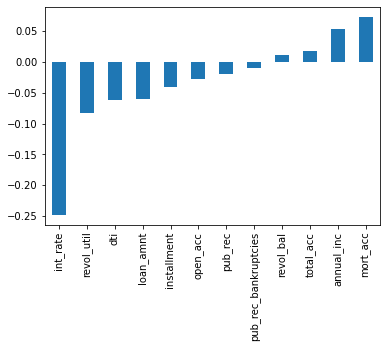

In [19]:
data.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

In [20]:
data=data.drop('emp_title',axis=1)

In [21]:
# Emp_length variable
e_order = sorted(data['emp_length'].dropna().unique())

<AxesSubplot:xlabel='emp_length', ylabel='count'>

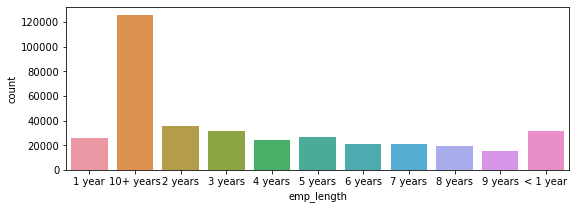

In [22]:
plt.figure(figsize=(9,3))
sns.countplot(x='emp_length',data=data,order=e_order)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

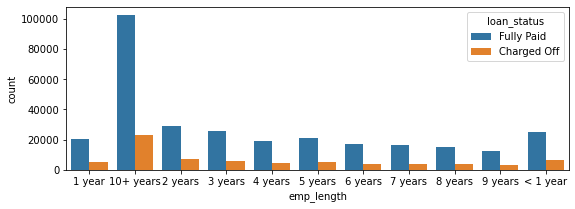

In [23]:
plt.figure(figsize=(9,3))
sns.countplot(x='emp_length',data=data,order=e_order,hue='loan_status')

In [24]:
data = data.drop('emp_length',axis=1)

In [25]:
# Title variable
data['title'].value_counts()

Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: title, Length: 48817, dtype: int64

In [26]:
data=data.drop('title',axis=1)

In [27]:
# Morgage accounts variable
data['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [28]:
data.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [29]:
data.groupby('total_acc').mean()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,loan_repaid
total_acc,,,,,,,,,,,,
2.0,6672.222222,15.801111,210.881667,64277.777778,2.279444,1.611111,0.000000,2860.166667,53.527778,0.000000,0.000000,0.777778
3.0,6042.966361,15.615566,198.728318,41270.753884,6.502813,2.611621,0.045872,3382.807339,49.991022,0.052023,0.015480,0.779817
4.0,7587.399031,15.069491,250.050194,42426.565969,8.411963,3.324717,0.041195,4874.231826,58.477400,0.066743,0.022951,0.785945
5.0,7845.734714,14.917564,256.190325,44394.098003,10.118328,3.921598,0.071499,5475.253452,56.890311,0.103289,0.041171,0.796844
6.0,8529.019843,14.651752,278.518228,48470.001156,11.222542,4.511119,0.104003,6546.374957,57.812483,0.151293,0.055077,0.784126
...,...,...,...,...,...,...,...,...,...,...,...,...
124.0,23200.000000,17.860000,587.370000,66000.000000,14.040000,43.000000,0.000000,25497.000000,75.400000,1.000000,0.000000,0.000000
129.0,25000.000000,7.890000,505.600000,200000.000000,8.900000,48.000000,0.000000,27659.000000,8.300000,1.000000,0.000000,1.000000
135.0,24000.000000,15.410000,576.140000,82000.000000,33.850000,57.000000,0.000000,35715.000000,50.800000,3.000000,0.000000,1.000000


In [30]:
data=data.dropna()

In [31]:
data.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [32]:
# Term variable
data['term'].value_counts()

 36 months    273605
 60 months     84409
Name: term, dtype: int64

In [33]:
data['term'] = data['term'].apply(lambda term:int(term[:3]))

In [34]:
data['term'].value_counts()

36    273605
60     84409
Name: term, dtype: int64

In [35]:
# Grade variable drop as retain sub grade
data = data.drop('grade',axis=1)

In [36]:
# Encoding data
dummies = pd.get_dummies(data['sub_grade'],drop_first=True)

data = pd.concat([data.drop('sub_grade',axis=1),dummies],axis=1)

In [37]:
dummies = pd.get_dummies(data[['verification_status','application_type','initial_list_status','purpose']],drop_first=True)

data = pd.concat([data.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1),dummies],axis=1)

In [38]:
# Home ownership variable
data['home_ownership'].value_counts()

MORTGAGE    181592
RENT        141604
OWN          34752
OTHER           34
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [39]:
data['home_ownership'] = data['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [40]:
dummies = pd.get_dummies(data['home_ownership'],drop_first=True)

data = pd.concat([data.drop('home_ownership',axis=1),dummies],axis=1)

In [41]:
# Address variable
data['address']

0            0174 Michelle Gateway\r\nMendozaberg, OK 22690
1         1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2         87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3                   823 Reid Ford\r\nDelacruzside, MA 00813
4                    679 Luna Roads\r\nGreggshire, VA 11650
                                ...                        
396024    514 Cynthia Park Apt. 402\r\nWest Williamside,...
396025     12951 Williams Crossing\r\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\r\nRachelborough, ...
396027    953 Matthew Points Suite 414\r\nReedfort, NY 7...
396028    7843 Blake Freeway Apt. 229\r\nNew Michael, FL...
Name: address, Length: 358014, dtype: object

In [42]:
# Extracting zip code from address and dropping rest
data['zip_code'] = data['address'].apply(lambda address:address[-5:])

In [43]:
data['zip_code'].value_counts()

70466    51552
30723    51180
22690    51030
48052    50556
00813    41156
29597    40858
05113    40752
11650    10412
93700    10347
86630    10171
Name: zip_code, dtype: int64

In [44]:
dummies = pd.get_dummies(data['zip_code'],drop_first=True)

data = pd.concat([data.drop('zip_code',axis=1),dummies],axis=1)

In [45]:
data = data.drop('address',axis=1)

In [46]:
# Dropping issue_d variable
data = data.drop('issue_d',axis=1)

In [47]:
# Earliest_cr_line variable - Extracting year
data['earliest_cr_line'] = data['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [48]:
data['earliest_cr_line']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396024    1991
396025    2004
396026    2006
396027    1997
396028    1990
Name: earliest_cr_line, Length: 358014, dtype: int64

In [49]:
# Drop loan status
data = data.drop('loan_status',axis=1)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X = data.drop('loan_repaid',axis=1)
y = data['loan_repaid'].values

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [53]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [55]:
model = Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [56]:
model.fit(x=X_train,y=y_train,epochs=25,validation_data=(X_test,y_test),batch_size=256)

Epoch 1/25
979/979 [==============================] - 8s 7ms/step - loss: 0.3083 - val_loss: 0.2674
Epoch 2/25
979/979 [==============================] - 6s 7ms/step - loss: 0.2702 - val_loss: 0.2659
Epoch 3/25
979/979 [==============================] - 7s 7ms/step - loss: 0.2677 - val_loss: 0.2643
Epoch 4/25
979/979 [==============================] - 6s 6ms/step - loss: 0.2661 - val_loss: 0.2639
Epoch 5/25
979/979 [==============================] - 7s 7ms/step - loss: 0.2652 - val_loss: 0.2640
Epoch 6/25
979/979 [==============================] - 6s 6ms/step - loss: 0.2646 - val_loss: 0.2637
Epoch 7/25
979/979 [==============================] - 6s 6ms/step - loss: 0.2638 - val_loss: 0.2633
Epoch 8/25
979/979 [==============================] - 7s 7ms/step - loss: 0.2634 - val_loss: 0.2632
Epoch 9/25
979/979 [==============================] - 6s 7ms/step - loss: 0.2630 - val_loss: 0.2634
Epoch 10/25
979/979 [==============================] - 5s 6ms/step - loss: 0.2625 - val_loss: 0.2630

In [57]:
losses = pd.DataFrame(model.history.history)

In [58]:
losses

,loss,val_loss
0,0.308273,0.267403
1,0.270179,0.265873
2,0.267679,0.264339
3,0.266120,0.263937
4,0.265247,0.263995
5,0.264572,0.263715
6,0.263831,0.263299
7,0.263421,0.263248
8,0.263015,0.263372
9,0.262546,0.263012


<AxesSubplot:>

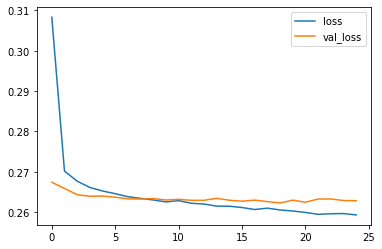

In [59]:
losses.plot()